Titanic survived Project

Project Description

The Titanic Problem is based on the sinking of the ‘Unsinkable’ ship Titanic in early 1912. It gives you information about multiple people like their ages, sexes, sibling counts, embarkment points, and whether or not they survived the disaster. 
Based on these features, you have to predict if an arbitrary passenger on Titanic would survive the sinking or not. 

Dataset Link-
https://github.com/dsrscientist/dataset1/blob/master/titanic_train.csv


In [31]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
# I want to move the target to the last column and have the features ordered aside

d_H_S = df.iloc[:, 1:2] 

df.drop(["Survived"], axis=1, inplace=True )

df["Survived"] = d_H_S

df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [12]:
df.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'Survived'],
      dtype='object')

DATA EXPLORATION & VISUALISATION

In [13]:
df.shape

(891, 12)

In [14]:
df.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
Survived         int64
dtype: object

there are three different types of data (int64,float64 which numerical continuous data and  object which represent categorical data), and looking at the data these are correct

In [16]:
print("null values in each column: ",df.isnull().sum())
print("\n")
print("sum of the null values: ", df.isnull().sum().sum())

null values in each column:  PassengerId      0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Survived         0
dtype: int64


sum of the null values:  866


We have null data points in the age and cabin columns as we could imagine at that time

The sum of null values are quite very high and therefore can't delete those roles sins I will be missing a lot of data so I will proceed as folllows:

1. The age I will replace the age with the average representative of the ages(mean value)
2. I will replace the missing Carbin and Embarked with the strings(They are categorica data)

This is a classification model

## Replacing NULL VALUES

In [20]:
df["Age"].fillna(value=df["Age"].mean(), inplace=True)
df["Embarked"].fillna("E", inplace=True)
df["Cabin"].fillna('C', inplace=True)

print("null values in each column: ",df.isnull().sum())
print("\n")
print("sum of the null values: ", df.isnull().sum().sum())

null values in each column:  PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
Survived       0
dtype: int64


sum of the null values:  0


<AxesSubplot:>

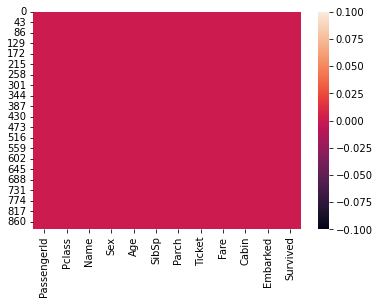

In [27]:
sns.heatmap(df.isnull())

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Name         891 non-null    object 
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        891 non-null    object 
 10  Embarked     891 non-null    object 
 11  Survived     891 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


The data presents 3 typer of datatype (float64(9), int64(1), object(2))), we will have to convert the object type to numerical values

In [23]:
# Separating Numerical and Categorical columns


Categorical_data = []
Numerical_data = []

for i in df.columns:
    if df.dtypes[i] == 'object':
        Categorical_data.append(i) # Checking for Categorical columns
    else:
        Numerical_data.append(i) #Checking for Numerical Columns


print("Categorical data: ", Categorical_data)
print("\n")
print("Numerical data: ", Numerical_data)

Categorical data:  ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']


Numerical data:  ['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Survived']


## Statiscal data of the numerical values

In [24]:
df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Survived
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208,0.383838
std,257.353842,0.836071,13.002015,1.102743,0.806057,49.693429,0.486592
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,22.000000,0.000000,0.000000,7.910400,0.000000
50%,446.000000,3.000000,29.699118,0.000000,0.000000,14.454200,0.000000
75%,668.500000,3.000000,35.000000,1.000000,0.000000,31.000000,1.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


This give the statiscal information of the numerical columns. we can see no negative values present we can observe that:

The counts of all the columns are same which means the are no missing values in the dataset.

The differences between the mean values and the median at 50 percentile through the means there are outliers

In summary, the data is distribuited, the standard deviation is high

I will check anyways for outliers.

In [26]:
#Checkin the number of unique values in each column
df.nunique().to_frame("No. of unique values"), #to_frame is used to create a data frame for the selected code

(             No. of unique values
 PassengerId                   891
 Pclass                          3
 Name                          891
 Sex                             2
 Age                            89
 SibSp                           7
 Parch                           7
 Ticket                        681
 Fare                          248
 Cabin                         148
 Embarked                        4
 Survived                        2,)

there is two unique vales in survived as expected, binary classification

In [28]:
df.corr()["Survived"] #there is any linear correlation between the survived and the other parameters as you can see by the graph below

PassengerId   -0.005007
Pclass        -0.338481
Age           -0.069809
SibSp         -0.035322
Parch          0.081629
Fare           0.257307
Survived       1.000000
Name: Survived, dtype: float64

PassengerId, Pclass and Age negatively correlates with the Survived neverthess the values are very small. I will leave them all for them all to see them outcome of the model first

<AxesSubplot:xlabel='Survived', ylabel='Fare'>

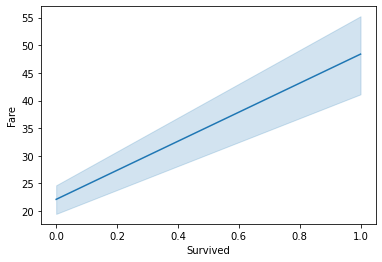

In [35]:
sns.lineplot(data=df, x="Survived", y = "Fare")
    

<AxesSubplot:xlabel='Survived', ylabel='Pclass'>

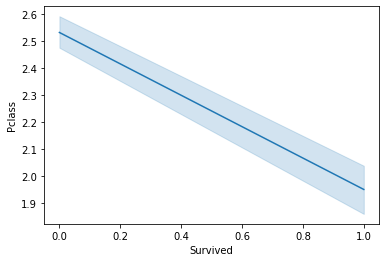

In [36]:
sns.lineplot(data=df, x="Survived", y = "Pclass")


<AxesSubplot:>

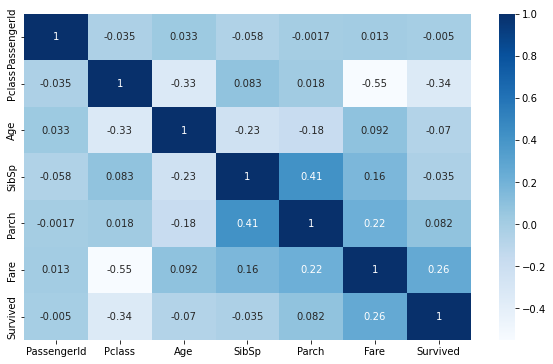

In [37]:
plt.figure(figsize = (10,6))
sns.heatmap(df.corr(), cmap="Blues",annot=True)

as observed

## Checking for outliers

PassengerId       AxesSubplot(0.125,0.536818;0.0945122x0.343182)
Pclass         AxesSubplot(0.238415,0.536818;0.0945122x0.343182)
Age            AxesSubplot(0.351829,0.536818;0.0945122x0.343182)
SibSp          AxesSubplot(0.465244,0.536818;0.0945122x0.343182)
Parch          AxesSubplot(0.578659,0.536818;0.0945122x0.343182)
Fare           AxesSubplot(0.692073,0.536818;0.0945122x0.343182)
Survived       AxesSubplot(0.805488,0.536818;0.0945122x0.343182)
dtype: object

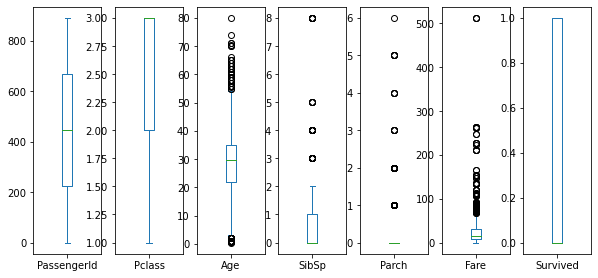

In [40]:
df.plot(kind ="box", subplots=True, layout=(2,7), figsize=(10,10))

 ## Removing Outliers

In [76]:
features = df[["Age","Fare"]]
features

,Age,Fare
0,22.000000,7.2500
1,38.000000,71.2833
2,26.000000,7.9250
3,35.000000,53.1000
4,35.000000,8.0500
...,...,...
886,27.000000,13.0000
887,19.000000,30.0000
888,29.699118,23.4500
889,26.000000,30.0000


In [74]:
# removing outliers with IQR METHOD

Q_1 = df['Age'].quantile(0.25)
Q_3 = df['Age'].quantile(0.75)
IQR = Q_3-Q_1  

upper_limit = Q_3 + (1.5*IQR)
lower_limit = Q_1 - (1.5*IQR)

df.loc[(df['Age'] > upper_limit) | (df['Age'] < lower_limit)]
new_df = df.loc[(df['Age'] < upper_limit) & (df['Age'] > lower_limit)]
print('old data: ', len(df))
print('new data: ', len(new_df))
print('outliers: ', len(df)-len(new_df))


old data:  891
new data:  825
outliers:  66


In [77]:
# removing outliers with IQR METHOD

Q_1 = df['Fare'].quantile(0.25)
Q_3 = df['Fare'].quantile(0.75)
IQR = Q_3-Q_1  

upper_limit = Q_3 + (1.5*IQR)
lower_limit = Q_1 - (1.5*IQR)

df.loc[(df['Fare'] > upper_limit) | (df['Fare'] < lower_limit)]
new_df = df.loc[(df['Fare'] < upper_limit) & (df['Fare'] > lower_limit)]
print('old data: ', len(df))
print('new data: ', len(new_df))
print('outliers: ', len(df)-len(new_df))

old data:  891
new data:  775
outliers:  116


## Checking for Skewness

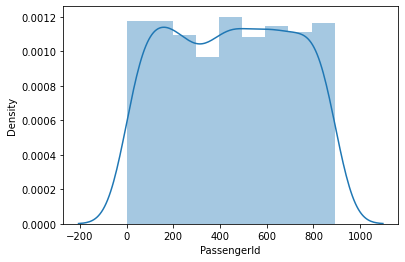

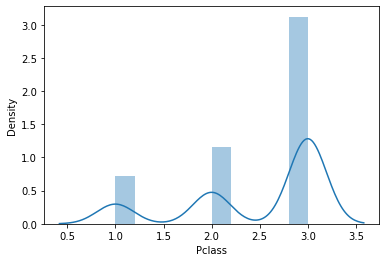

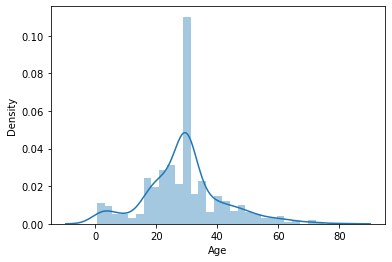

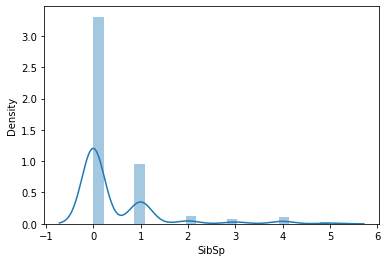

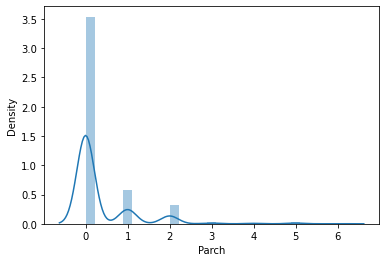

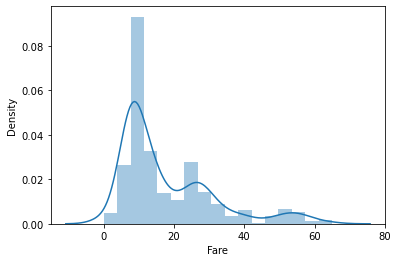

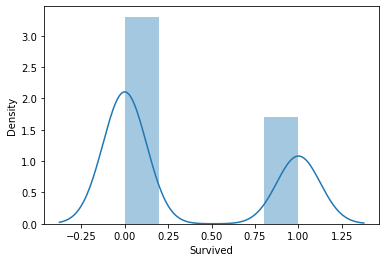

In [93]:
for i in new_df.columns:
    if new_df[i].dtype != object:
        ax = sns.distplot(new_df[i])
        plt.show()

In [101]:
new_df.skew()

PassengerId   -0.007285
Pclass        -1.029597
Age            0.435012
SibSp          2.790689
Parch          3.145571
Fare           1.430672
Survived       0.679874
dtype: float64

## Removing skewness with Log Transformation

In [108]:
new_df['Age'] = np.log1p(new_df['Age'])
new_df['SibSp'] = np.log1p(new_df['SibSp'])
new_df['Parch'] = np.log1p(new_df['Parch'])
new_df['Fare'] = np.log1p(new_df['Fare'])

new_df.skew()

PassengerId   -0.007285
Pclass        -1.029597
Age           -3.181442
SibSp          1.306058
Parch          1.640809
Fare          -0.514791
Survived       0.679874
dtype: float64

## Visualiing the correlation between label and features using bar plot

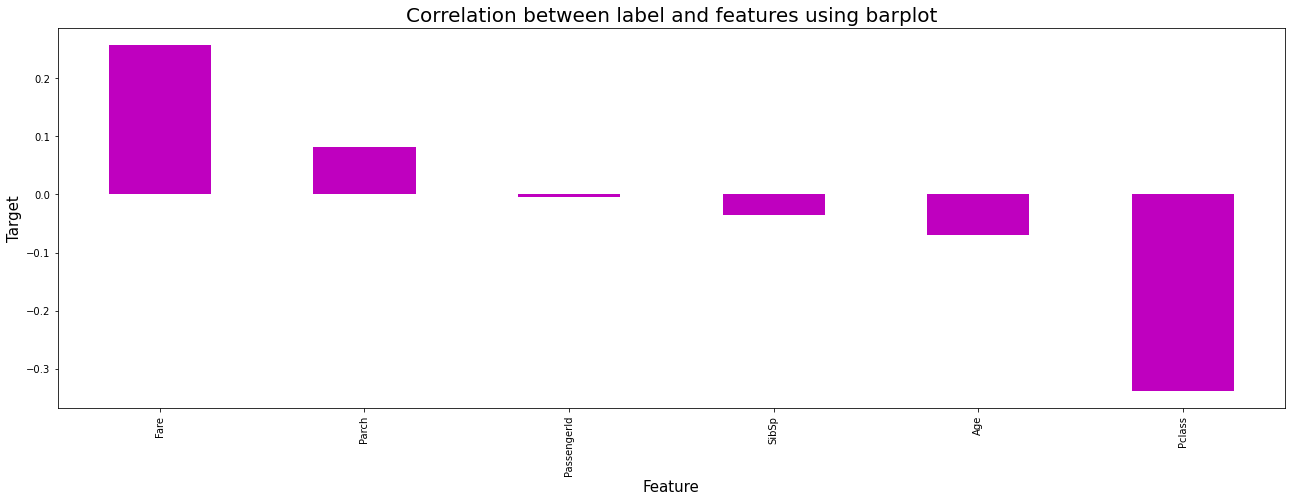

In [79]:
plt.figure(figsize=(22,7))
df.corr()["Survived"].sort_values(ascending = False).drop(["Survived"]).plot(kind = "bar", color = "m")
plt.xlabel("Feature", fontsize = 15)
plt.ylabel("Target", fontsize = 15)
plt.title("Correlation between label and features using barplot", fontsize= 20)
plt.show()

## ENCODING CATEGORICAL DATA 



In [128]:
del new_df["Name"]

In [129]:
# Encoding categorical data using OrdinalEncoder
from sklearn.preprocessing import OrdinalEncoder
OE = OrdinalEncoder()

for i in new_df.columns:
    if new_df[i].dtypes == "object":
        new_df[i] = OE.fit_transform(new_df[i].values.reshape(-1,1))
new_df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,3,1.0,1.419607,0.526589,0.0,495.0,2.110213,87.0,2.0,0
2,3,3,0.0,1.457646,0.000000,0.0,621.0,2.188856,87.0,2.0,1
3,4,1,0.0,1.522467,0.526589,0.0,41.0,3.990834,35.0,2.0,1
4,5,3,1.0,1.522467,0.000000,0.0,444.0,2.202765,87.0,2.0,0
5,6,3,1.0,1.487097,0.000000,0.0,253.0,2.246893,87.0,1.0,0


In [130]:
new_df.corr()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
PassengerId,1.000000,-0.045179,0.058468,0.012635,-0.073956,-0.019362,-0.053915,-0.017831,-0.031236,0.013444,-0.024438
Pclass,-0.045179,1.000000,0.011810,-0.192261,0.063685,0.063274,0.401424,-0.489322,0.635487,0.022424,-0.238532
Sex,0.058468,0.011810,1.000000,0.108568,-0.197933,-0.303442,0.042127,-0.187440,-0.015654,0.069446,-0.499888
Age,0.012635,-0.192261,0.108568,1.000000,-0.361444,-0.442446,-0.024894,-0.106783,-0.157854,0.029164,-0.175191
SibSp,-0.073956,0.063685,-0.197933,-0.361444,1.000000,0.485880,0.028468,0.430918,0.073271,0.036794,0.061883
Parch,-0.019362,0.063274,-0.303442,-0.442446,0.485880,1.000000,0.042952,0.398563,0.072420,-0.003306,0.148916
Ticket,-0.053915,0.401424,0.042127,-0.024894,0.028468,0.042952,1.000000,-0.199209,0.285022,0.073539,-0.158986
Fare,-0.017831,-0.489322,-0.187440,-0.106783,0.430918,0.398563,-0.199209,1.000000,-0.328247,-0.057515,0.247415
Cabin,-0.031236,0.635487,-0.015654,-0.157854,0.073271,0.072420,0.285022,-0.328247,1.000000,0.125255,-0.160636
Embarked,0.013444,0.022424,0.069446,0.029164,0.036794,-0.003306,0.073539,-0.057515,0.125255,1.000000,-0.107012


In [131]:
x = new_df.drop(["Survived"], axis=1)
y =new_df.Survived

# dimension of the features and target
print("x.shape: ", x.shape)
print("y.shape: ", y.shape)

x.shape:  (775, 10)
y.shape:  (775,)


## Feature Scaling using Standard Scalarization

In [132]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x= pd.DataFrame(scaler.fit_transform(x), columns = x.columns)
x

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,-1.711134,0.708528,0.677872,-0.089149,1.224245,-0.506271,0.995906,-0.824136,0.341445,0.539781
1,-1.703440,0.708528,-1.475205,0.111424,-0.598832,-0.506271,1.687300,-0.713891,0.341445,0.539781
2,-1.699593,-2.016580,-1.475205,0.453208,1.224245,-0.506271,-1.495310,1.812201,-2.700163,0.539781
3,-1.695746,0.708528,0.677872,0.453208,-0.598832,-0.506271,0.716055,-0.694393,0.341445,0.539781
4,-1.691899,0.708528,0.677872,0.266711,-0.598832,-0.506271,-0.332011,-0.632533,0.341445,-0.822858
...,...,...,...,...,...,...,...,...,...,...
770,1.697235,-0.654026,0.677872,0.155875,-0.598832,-0.506271,-1.281307,-0.082779,0.341445,0.539781
771,1.701082,-2.016580,-1.475205,-0.270426,-0.598832,-0.506271,-1.659928,1.031589,-3.402073,0.539781
772,1.704929,0.708528,-1.475205,0.266711,1.224245,2.261737,1.720224,0.698851,0.341445,0.539781
773,1.708776,-2.016580,0.677872,0.111424,-0.598832,-0.506271,-1.692851,1.031589,-2.466193,-2.185496


In [133]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif =  pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif["Features"] = x.columns

vif

,VIF values,Features
0,1.012783,PassengerId
1,2.377666,Pclass
2,1.123338,Sex
3,1.349305,Age
4,1.616018,SibSp
5,1.721671,Parch
6,1.211150,Ticket
7,2.069405,Fare
8,1.727920,Cabin
9,1.041375,Embarked


Normally VIF > 1 indicates some level of multicollinearity. Multicollinearity increases with the VIF. Common threshold values for identifying multicollinearity VIF > 10 and therefore I will leave it to look at the outcome of the model

In [135]:
y.value_counts()

0    512
1    263
Name: Survived, dtype: int64

Here we can see that the data is not balanced, since it is a classification we will balance the data using oversampling method.

## Oversampling

In [136]:
# oversampling the dataa
from imblearn.over_sampling import SMOTE 
SM = SMOTE()
x1,y1 = SM.fit_resample(x,y)

In [137]:
y1.value_counts()

0    512
1    512
Name: Survived, dtype: int64

## Modelling

In [141]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

maxAccu = 0
maxRS = 0 

for i in range(1, 200):
    x_train,x_test, y_train, y_test = train_test_split(x1, y1, test_size=0.3, random_state=i)
    RFR = RandomForestClassifier()
    RFR.fit(x_train, y_train)
    pred = RFR.predict(x_test)
    acc = accuracy_score(y_test, pred)
    if (acc > maxAccu):
        maxAccu = acc
        maxRS = i
print("Best accuracy is ", maxAccu, "at random_state", maxRS)

x_train,x_test, y_train, y_test = train_test_split(x1, y1, test_size=0.3, random_state=maxRS)

rfc = RandomForestClassifier()
lg = LogisticRegression()
exc = ExtraTreesClassifier()
svc = SVC()
gbc =GradientBoostingClassifier()
abc = AdaBoostClassifier()
bc = BaggingClassifier()

models = [rfc, lg, exc, svc, gbc, abc,bc]
for model in models:
    model.fit(x_train, y_train)
    model.score(x_train, y_train)
    pred_model = model.predict(x_test)
    print("Accuracy score of ", model, "is: ")
    print(accuracy_score(y_test ,pred_model))
    print(confusion_matrix(y_test,pred_model))
    print(classification_report(y_test,pred_model))
    print('\n')




Best accuracy is  0.8896103896103896 at random_state 127
Accuracy score of  RandomForestClassifier() is: 
0.8928571428571429
[[143  12]
 [ 21 132]]
              precision    recall  f1-score   support

           0       0.87      0.92      0.90       155
           1       0.92      0.86      0.89       153

    accuracy                           0.89       308
   macro avg       0.89      0.89      0.89       308
weighted avg       0.89      0.89      0.89       308



Accuracy score of  LogisticRegression() is: 
0.8181818181818182
[[135  20]
 [ 36 117]]
              precision    recall  f1-score   support

           0       0.79      0.87      0.83       155
           1       0.85      0.76      0.81       153

    accuracy                           0.82       308
   macro avg       0.82      0.82      0.82       308
weighted avg       0.82      0.82      0.82       308



Accuracy score of  ExtraTreesClassifier() is: 
0.8863636363636364
[[141  14]
 [ 21 132]]
              prec

RandomForestClassifier() and ExtraTreesClassifier() is leading with the accuracy score with 89.2857 and 88.636 respectively


## Cross Validation Score (parameter to check the well fitting)

In [142]:
from sklearn.model_selection import cross_val_score

models = [rfc, lg, exc, svc, gbc, abc,bc]

for model in models:
    score = cross_val_score(model,x,y,cv=5) 
    print("Cross validare score of ", model, "is: ")
    print(score)   
    print("cross validation score mean is ", score.mean())
    print("cross validation score std is ", score.std())
    print("Difference between Accuracy score and cross validation score is", accuracy_score(y_test ,pred_model)-score.mean())
    print('\n')

Cross validare score of  RandomForestClassifier() is: 
[0.8        0.79354839 0.85806452 0.85806452 0.87096774]
cross validation score mean is  0.8361290322580646
cross validation score std is  0.0325406973236606
Difference between Accuracy score and cross validation score is 0.004780058651026375


Cross validare score of  LogisticRegression() is: 
[0.7483871  0.76129032 0.78064516 0.78064516 0.83870968]
cross validation score mean is  0.7819354838709678
cross validation score std is  0.030913931743770183
Difference between Accuracy score and cross validation score is 0.058973607038123155


Cross validare score of  ExtraTreesClassifier() is: 
[0.8        0.77419355 0.8        0.84516129 0.87096774]
cross validation score mean is  0.8180645161290322
cross validation score std is  0.03495797983004921
Difference between Accuracy score and cross validation score is 0.022844574780058746


Cross validare score of  SVC() is: 
[0.79354839 0.79354839 0.81290323 0.79354839 0.82580645]
cross vali

The best model is the one with lower std and lower value of the difference between accuracy score and cross validation score, between the two we choose the lowest value difference: The models present the same order and the difference between the accuracy score and cross validation is not relevante and therefore i opt for the ExtratreeClassifier with higher accuracy.

## HyperTuning

In [144]:
parameters = {
    'criterion': ['gini', 'entropy'],
    'random_state': [10, 50, 1000],  
    'max_depth': [None, 10, 30],     
    'n_jobs': [-1, 1],                
    'n_estimators': [50, 100, 200, 300]
}

GCV = GridSearchCV(ExtraTreesClassifier(), parameters, cv=5)
GCV.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 30],
                         'n_estimators': [50, 100, 200, 300], 'n_jobs': [-1, 1],
                         'random_state': [10, 50, 1000]})

In [145]:
GCV.best_params_

{'criterion': 'entropy',
 'max_depth': None,
 'n_estimators': 100,
 'n_jobs': -1,
 'random_state': 50}

In [146]:
Final_model = ExtraTreesClassifier(criterion = "entropy", 
                                   max_depth = None,
                                   random_state = 50,
                                   n_jobs = -1, 
                                   n_estimators =50)
Final_model.fit(x_train, y_train)
pred = Final_model.predict(x_test)
acc = accuracy_score(y_test, pred)
print("accuracy score %: ", acc*100)

accuracy score %:  88.31168831168831


## Plotting ROC and compare AUC for all models used

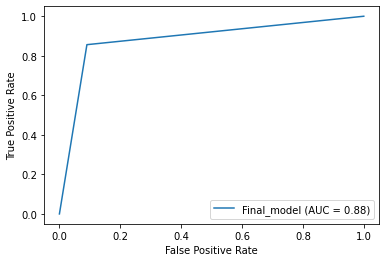

In [147]:
# sklearn.metric.RocCurveDisplay.from_predictions 
from sklearn import metrics
from sklearn.metrics import RocCurveDisplay

fpr, tpr, thresholds = metrics.roc_curve(y_test, pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,estimator_name='Final_model')
display.plot()

## Saving the Data

In [148]:
import joblib
joblib.dump(Final_model, "Titanic_survived.pkl")

['Titanic_survived.pkl']

## Pridicting with the saving model (deserialization)

In [149]:
import joblib
model_loaded = joblib.load("Titanic_survived.pkl")

# Making prediction
prediction = model_loaded.predict(x_test)
prediction

array([0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,

## These are the predicted values

In [150]:
a = np.array(y_test)
df2 = pd.DataFrame()
df2["Predicted"] = prediction
df2["Original"] = a
df2

,Predicted,Original
0,0,0
1,0,0
2,1,1
3,0,0
4,1,1
...,...,...
303,0,0
304,0,0
305,1,1
306,0,0
